In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import random

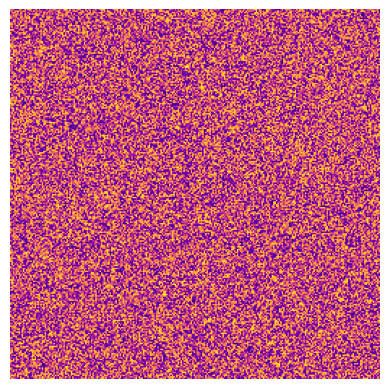

In [4]:
width = 256
height = 256

noise = np.random.rand(width, height) * 0.5
sin_noise = np.sin(np.linspace(0, 3*np.pi, width))[:, np.newaxis] * 10
mask = np.ones((height, width))
mask[:, width // 2:] = 1

new_image = noise * mask

fig, ax = plt.subplots()
heatmap1 = ax.imshow(new_image, cmap='plasma')
ax.axis("off")
plt.show()

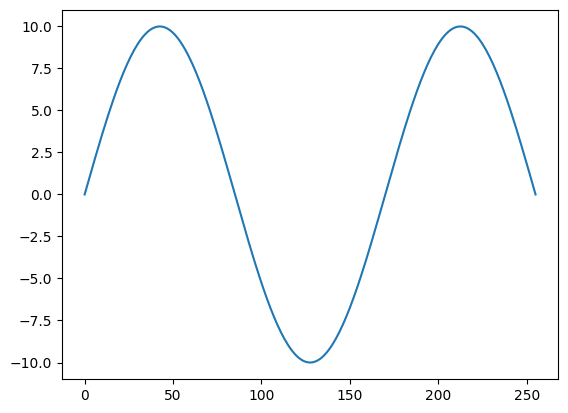

In [5]:
np.set_printoptions(threshold=np.inf)
plt.plot(sin_noise)

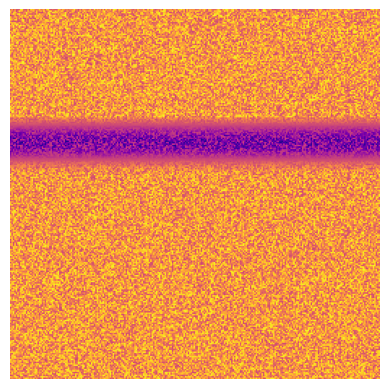

In [22]:
width = 256
height = 256

noise = np.random.rand(width, height) * 10
sin_noise = np.sin(np.linspace(0, 3*np.pi, width))[:, np.newaxis] * 10

test = np.sin(np.linspace(1, 3*np.pi, width//4))[:, np.newaxis] * np.ones((1, height))
test[[0,1,2,3,4,5,6,7,8,9,10,-1,-2,-3,-4,-5,-6,-7,-9,-8,-10], :] = 1

mask = np.ones((height, width))
mask[height//4:height//2, :width] = test

new_image = noise * mask

fig, ax = plt.subplots()
heatmap1 = ax.imshow(new_image, cmap='plasma')
ax.axis("off")
plt.show()

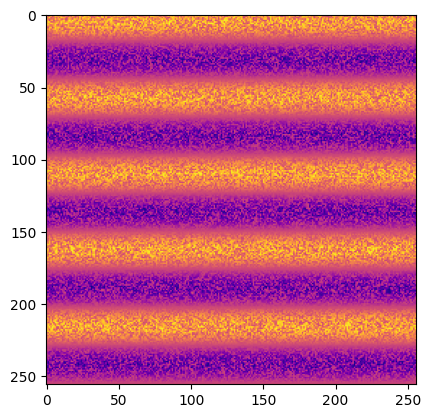

In [21]:
width = 256
height = 256

noise = np.random.rand(width, height) * 10
sin_noise = np.sin(np.linspace(0, 10*np.pi, width))[:, np.newaxis] * 10

test = np.sin(np.linspace(1, 10*np.pi, width))[:, np.newaxis] * np.ones((1, height))
# test[[0,1,2,3,4,5,6,7,8,9,10,-1,-2,-3,-4,-5,-6,-7,-9,-8,-10], :] = 1

mask = np.ones((height, width))
mask[:, :width] = test

new_image = noise * mask

fig, ax = plt.subplots()
heatmap1 = ax.imshow(new_image, cmap='plasma')
plt.show()

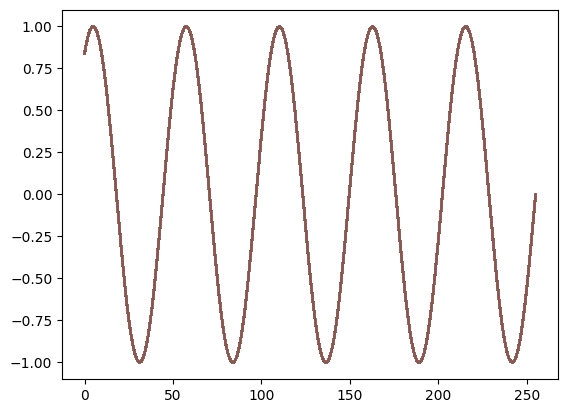

In [19]:
plt.plot(test)

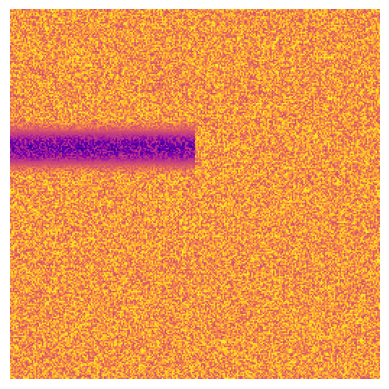

In [4]:
width = 256
height = 256


sin_noise = np.sin(np.linspace(0, 1*np.pi, width))[:, np.newaxis] * 0.5

test = np.sin(np.linspace(0, 3*np.pi, width//4))[:, np.newaxis] * np.ones((1, height//2))
test[[0,1,2,3,4,5,6,7,8,9,10,-1,-2,-3,-4,-5,-6,-7,-9,-8,-10], :] = 1
mask = np.ones((height, width))
mask[height//4:height//2, :width // 2] = test

new_image = noise * mask

fig, ax = plt.subplots()
heatmap1 = ax.imshow(new_image, cmap='plasma')
ax.axis("off")
plt.show()

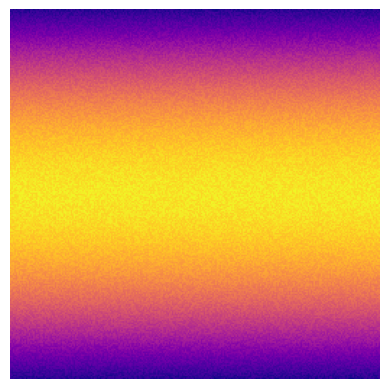

In [5]:
width = 256
height = 256

noise = np.random.rand(width, height) * 1
noise += np.sin(np.linspace(0, np.pi, width))[:, np.newaxis] * 10

mask = np.ones((height, width))

new_image = noise * mask

fig, ax = plt.subplots()
heatmap1 = ax.imshow(new_image, cmap='plasma')
ax.axis("off")
plt.show()

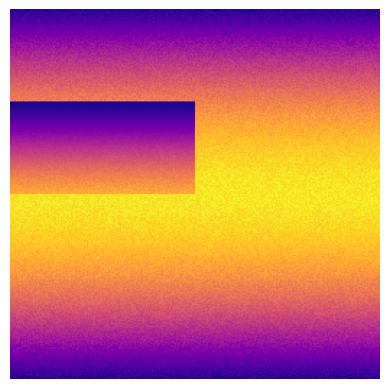

In [6]:
width = 256
height = 256
import sys

sin_noise = np.sin(np.linspace(0, 1*np.pi, width))[:, np.newaxis] * 0.5

test = np.sin(np.linspace(0,1, width//4))[:, np.newaxis] * np.ones((1, height//2))

mask = np.ones((height, width))
mask[height//4:height//2, :width // 2] = test

new_image = noise * mask

fig, ax = plt.subplots()
heatmap1 = ax.imshow(new_image, cmap='plasma')
ax.axis("off")
plt.show()

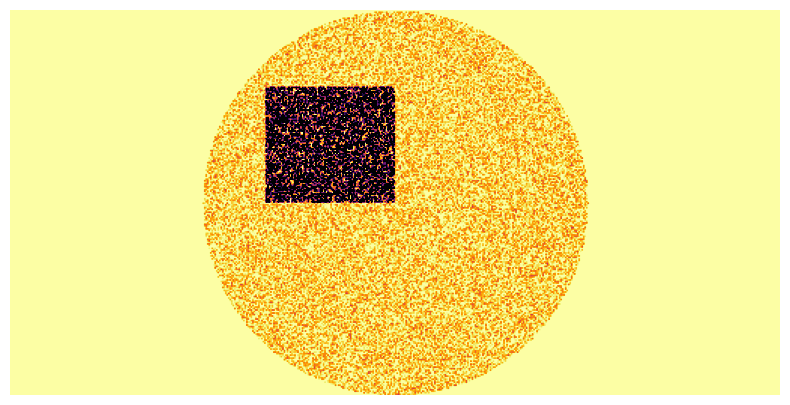

In [7]:
import numpy as np
import matplotlib.pyplot as plt

width = 512
height = 256

center_x, center_y = width // 2, height // 2
radius = width // 4
mask = np.zeros((height, width))
for i in range(height):
    for j in range(width):
        distance = np.sqrt(((i - center_y) ** 2) + ((j - center_x) ** 2))
        mask[i, j] = 1 if distance <= radius else 0

background_noise = np.random.rand(height, width) * 0.2

hot_spots = np.random.rand(height, width) * 0.3 * mask
hot_spots[height // 5: height // 2, width // 3: width // 2] *=5
hot_spots[height // 4: height // 2, width // 7: width // 5] *=10

temperature = background_noise + hot_spots
temperature[temperature < background_noise.max()] = background_noise.max()


cmap = 'inferno_r' 
vmin, vmax = 0.2, 0.8  
fig, ax = plt.subplots(figsize=(10, 5))
heatmap = ax.imshow(temperature, cmap=cmap, vmin=vmin, vmax=vmax)
# plt.colorbar(heatmap, label='Temperature')
plt.axis('off') 
plt.savefig(f"topview.png",bbox_inches='tight', pad_inches=0)
plt.show()



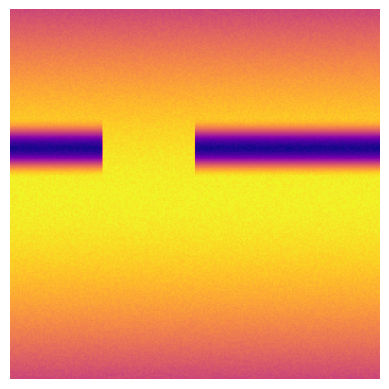

In [8]:
width = 256
height = 256


sin_noise = np.sin(np.linspace(0, 1*np.pi, width))[:, np.newaxis] * 0.5

test = np.sin(np.linspace(0, 3*np.pi, width//4))[:, np.newaxis] * np.ones((1, height//2))
test = np.sin(np.linspace(0, 3*np.pi, width//4))[:, np.newaxis] * np.ones((1, height//2))
test[[0,1,2,3,4,5,6,7,8,9,10,-1,-2,-3,-4,-5,-6,-7,-9,-8,-10], :] = 1
mask = np.ones((height, width))
mask[height//4:height//2, :width // 2] = test
mask[height//4:height//2, width // 2:] = test
mask[height//4:height//2, width // 4:width // 2] = 1
new_image = noise * mask

fig, ax = plt.subplots()
heatmap1 = ax.imshow(new_image, cmap='plasma')
ax.axis("off")
plt.savefig(f"newthermal.png",bbox_inches='tight', pad_inches=0)
plt.show()

In [9]:
def apply_padding(image, padding_size):
    image[:padding_size, :] = 255 
    image[-padding_size:, :] = 255  
    return image

def blob_segmentation(binary_image, padding_size=2):
    padded_binary_image = apply_padding(binary_image, padding_size)
    blob_image, num_labels = label_connected_components(padded_binary_image)
    return padded_binary_image

def label_connected_components(binary_image):
    blob_image = np.zeros_like(binary_image)
    current_label = 1

    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            if binary_image[i, j] == 1 and blob_image[i, j] == 0:
                stack = [(i, j)]
                while stack:
                    current_i, current_j = stack.pop()
                    if (0 <= current_i < binary_image.shape[0] and 
                        0 <= current_j < binary_image.shape[1] and
                        binary_image[current_i, current_j] == 1 and
                        blob_image[current_i, current_j] == 0):
                        blob_image[current_i, current_j] = current_label
                        stack.extend([(current_i+x, current_j+y) for x in [-1, 0, 1] for y in [-1, 0, 1]])

                current_label += 1

    return blob_image, current_label - 1

In [10]:
def EndToEndDistance(blob_image):
    binary_image = blob_image.astype(np.uint8)
    _, labels, _, _ = cv2.connectedComponentsWithStats(binary_image)
    print("Total Blobs are : ", len(np.unique(labels)) - 1)

    if len(np.unique(labels)) >= 2:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(binary_image, cmap='gray')
        plt.title('Binary Image')

        plt.subplot(1, 2, 2)
        plt.imshow(binary_image, cmap='gray')

        all_distances = []

        for i in range(1, len(np.unique(labels))):
            for j in range(i + 1, len(np.unique(labels))):
                blob_mask1 = (labels == i).astype(np.uint8)
                blob_mask2 = (labels == j).astype(np.uint8)

                contours1, _ = cv2.findContours(blob_mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                contours2, _ = cv2.findContours(blob_mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                if contours1 and contours2:
                    hull1 = cv2.convexHull(contours1[0])
                    hull2 = cv2.convexHull(contours2[0])

                    points_hull1 = hull1[:, 0, :]
                    points_hull2 = hull2[:, 0, :]

                    distance = np.linalg.norm(points_hull1[:, np.newaxis, :] - points_hull2, axis=2)
                    min_distance = np.min(distance)

                    all_distances.append(min_distance)

                    for d in distance:
                        plt.plot(points_hull1[:, 0], points_hull1[:, 1], 'r-')
                        plt.plot(points_hull2[:, 0], points_hull2[:, 1], 'b-')

        if all_distances:
            print("All Distances:", all_distances)
            plt.title('End to End Distance')
            plt.show()
        else:
            print("Contours not found for one or more blobs.")
    else:
        print("There are less than two blobs in the image.")
def CentroidDistance(blob_image):
    binary_image = blob_image.astype(np.uint8)
    _, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image)

    if len(centroids) >= 2:
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.imshow(binary_image, cmap='gray')
        plt.title('Binary Image')

        blob_image_rgb = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2RGB)
        
        for i in range(1, len(centroids)):
            cv2.circle(blob_image_rgb, (int(centroids[i][0]), int(centroids[i][1])), 5, (255, 0, 0), -1)
        
        plt.subplot(1, 3, 2)
        plt.imshow(blob_image_rgb)
        plt.title('Connected Centroids')

        all_distances = []
        
        for i in range(1, len(centroids)):
            for j in range(i + 1, len(centroids)):
                centroid_blob1 = centroids[i]
                centroid_blob2 = centroids[j]
                
                distance_between_blobs = np.linalg.norm(centroid_blob1 - centroid_blob2)
                all_distances.append(distance_between_blobs)

                plt.subplot(1, 3, 3)
                plt.imshow(blob_image_rgb)
                plt.plot([centroid_blob1[0], centroid_blob2[0]], [centroid_blob1[1], centroid_blob2[1]], 'r-')
                plt.title('Distances between Centroids')

        if all_distances:
            print("All Distances between Centroids:", all_distances)
            plt.show()
        else:
            print("Distances not found for one or more blobs.")
    else:
        print("There are less than two blobs in the image.")
def BlobLength(blob_image):
    binary_image = blob_image.astype(np.uint8)
    _, labels, _, _ = cv2.connectedComponentsWithStats(binary_image)
    print("Total Blobs are : ", len(np.unique(labels)) - 1)

    if len(np.unique(labels)) >= 2:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(binary_image, cmap='gray')
        plt.title('Binary Image')

        plt.subplot(1, 2, 2)
        plt.imshow(binary_image, cmap='gray')

        all_lengths = []

        for i in range(1, len(np.unique(labels))):
            blob_mask = (labels == i).astype(np.uint8)
            contours, _ = cv2.findContours(blob_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            if contours:
                contour = contours[0]  
                contour_points = contour.reshape(-1, 2)

                pairwise_distances = np.linalg.norm(contour_points[:, None] - contour_points, axis=-1)
                # np.fill_diagonal(pairwise_distances, 0)
                max_distance = np.max(pairwise_distances)
                all_lengths.append(max_distance)

                plt.plot(contour_points[:, 0], contour_points[:, 1], 'r-')

        if all_lengths:
            print("Lengths of blobs:", all_lengths)
            plt.title("Contours - End to End distances")
            plt.axis('off')
            plt.show()
            
        else:
            print("Contours not found for one or more blobs.")
    else:
        print("There are less than two blobs in the image.")

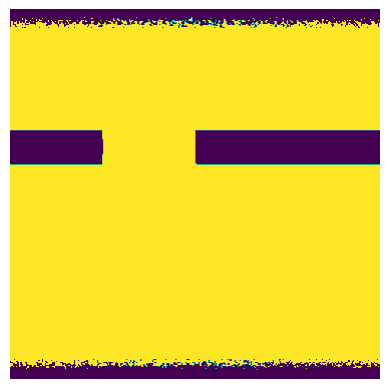

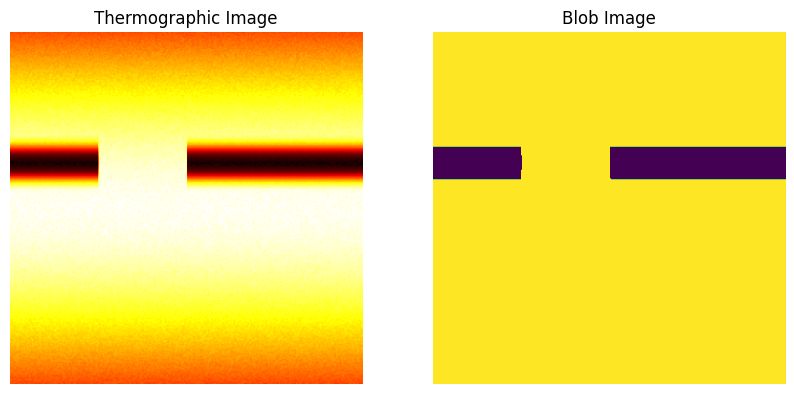

In [11]:
image=cv2.imread('newthermal.png',0)

threshold_value = 128

_, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image)
plt.axis('off') 
plt.show()
np.set_printoptions(threshold=sys.maxsize)

blob_image = blob_segmentation(binary_image, padding_size=50)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='hot')
plt.title("Thermographic Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blob_image, cmap='viridis')
plt.title("Blob Image")
plt.axis('off')
plt.show()


In [12]:
blob_image = (blob_image == 0)

Total Blobs are :  2
Lengths of blobs: [96.79876032264049, 185.9516066077408]


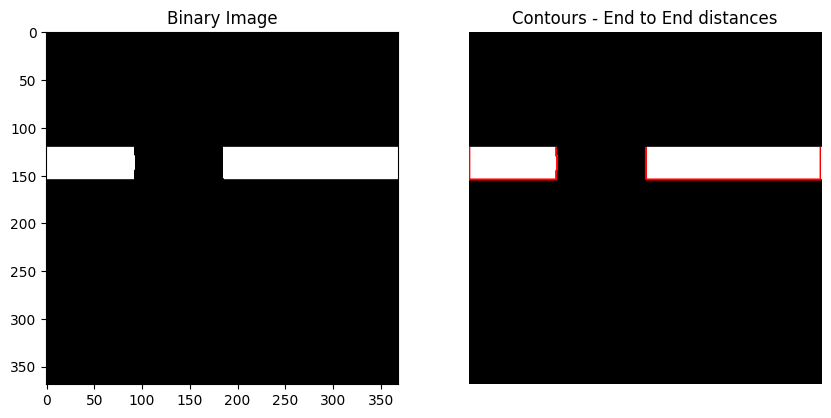

In [13]:
BlobLength(blob_image)

All Distances between Centroids: [230.79270656666887]


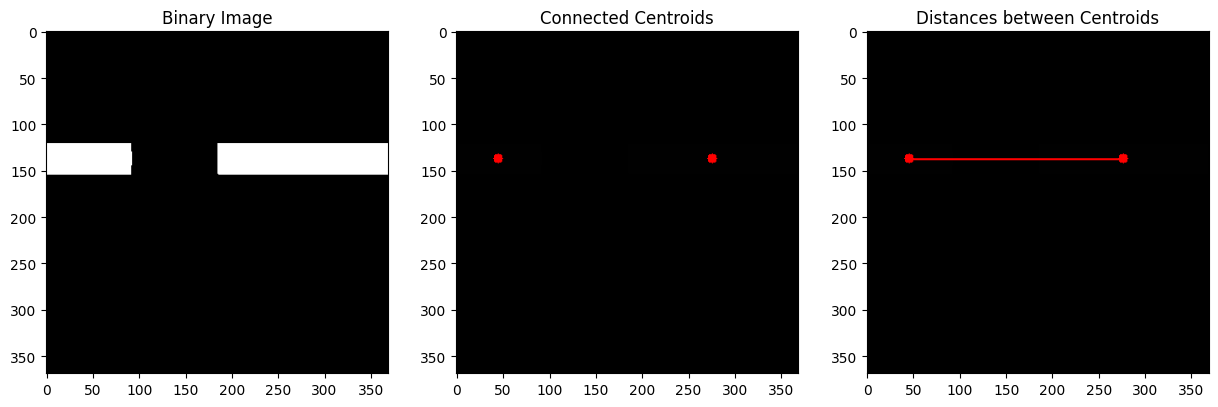

Total Blobs are :  2
All Distances: [93.43446901438462]


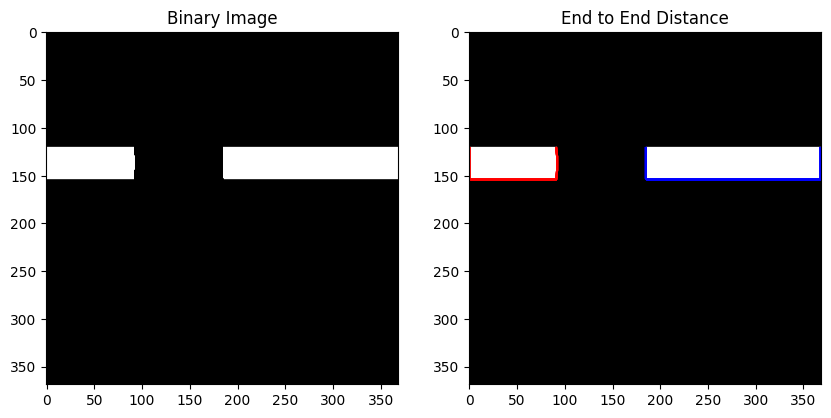

Total Blobs are :  2
Lengths of blobs: [96.79876032264049, 185.9516066077408]


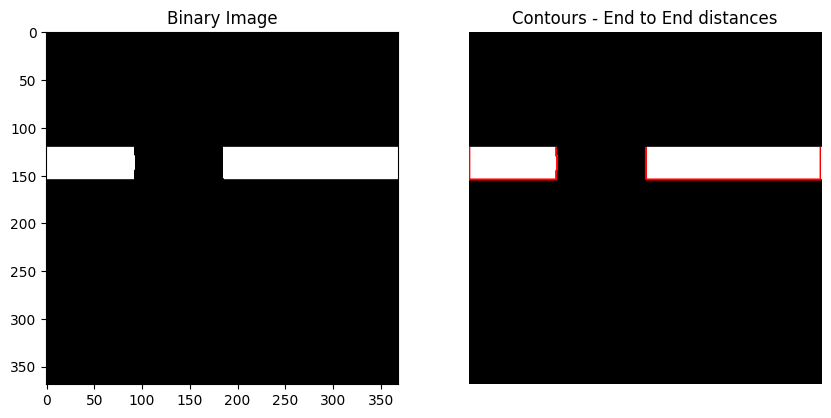

In [14]:
CentroidDistance(blob_image)
EndToEndDistance(blob_image)
BlobLength(blob_image)

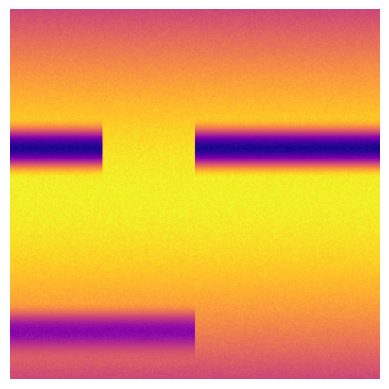

In [15]:
width = 256
height = 256


sin_noise = np.sin(np.linspace(0, 1*np.pi, width))[:, np.newaxis] * 0.5


test = np.sin(np.linspace(0, 3*np.pi, width//4))[: , np.newaxis] * np.ones((1, height//2))
another = np.sin(np.linspace(0, 3*np.pi, width//4))[:, np.newaxis] * np.ones((1, height//2))
test[[0,1,2,3,4,5,6,7,8,9,10,-1,-2,-3,-4,-5,-6,-7,-9,-8,-10], :] = 1
another[[0,1,2,3,4,5,6,7,8,9,10,-1,-2,-3,-4,-5,-6,-7,-9,-8,-10], :] = 1
mask = np.ones((height, width))
mask[height//4:height//2, :width // 2] = test
mask[height//4:height//2, width // 2:] = test
mask[-height//4:, :width // 2] = another
mask[height//4:height//2, width // 4:width // 2] = 1
new_image = noise * mask

fig, ax = plt.subplots()
heatmap1 = ax.imshow(new_image, cmap='plasma')
ax.axis("off")
plt.savefig(f"anotherthermal.png",bbox_inches='tight', pad_inches=0)
plt.show()

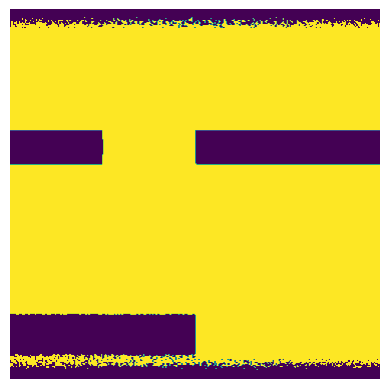

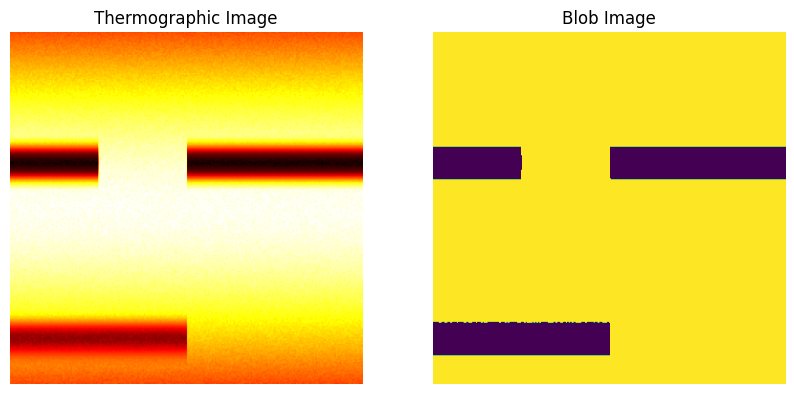

In [16]:
image=cv2.imread('anotherthermal.png',0)

threshold_value = 128


_, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image)
plt.axis('off') 
plt.show()
np.set_printoptions(threshold=sys.maxsize)

blob_image = blob_segmentation(binary_image, padding_size=30)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='hot')
plt.title("Thermographic Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blob_image, cmap='viridis')
plt.title("Blob Image")
plt.axis('off')
plt.show()


In [17]:
blob_image = (blob_image == 0)

Total Blobs are :  3
Lengths of blobs: [96.79876032264049, 185.9516066077408, 187.11493793922494]


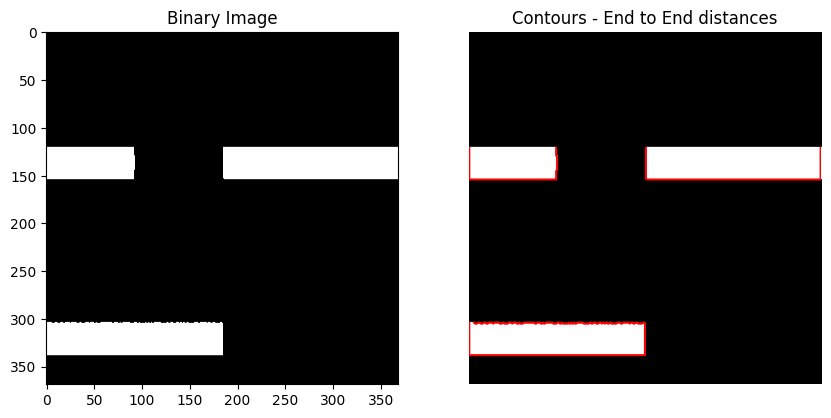

In [18]:
BlobLength(blob_image)

Total Blobs are :  3
All Distances: [93.43446901438462, 150.0, 150.02999700059985]


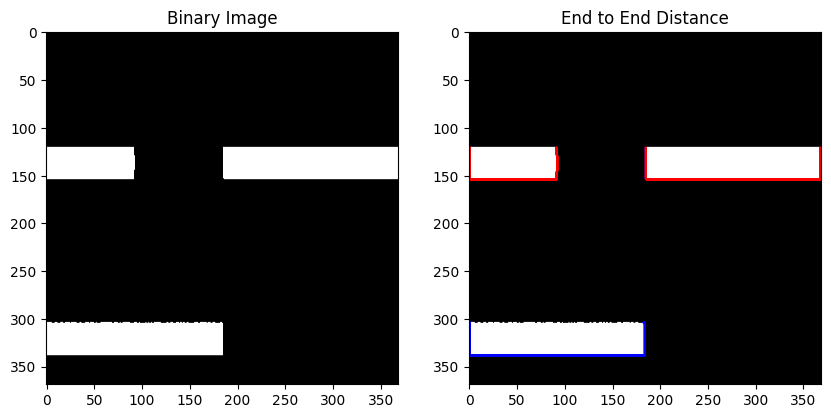

All Distances between Centroids: [230.79270656666887, 189.43220875935822, 260.4327759467077]


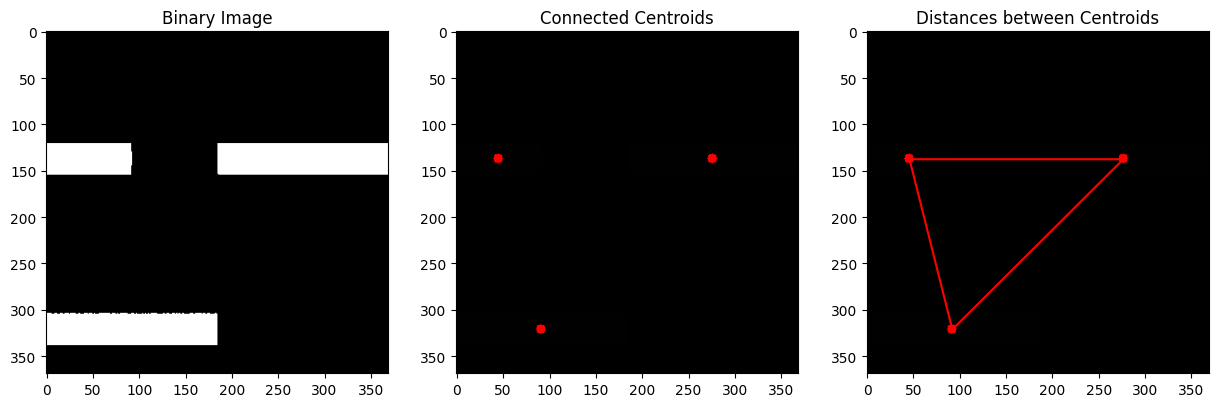

In [19]:
EndToEndDistance(blob_image)
CentroidDistance(blob_image)

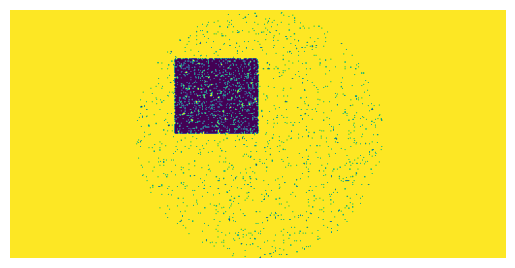

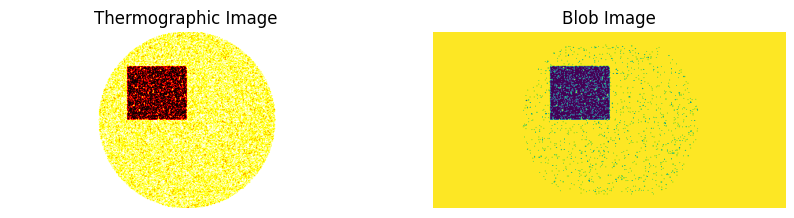

In [20]:
image=cv2.imread('topview.png',0)

threshold_value = 128


_, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image)
plt.axis('off') 
plt.show()
np.set_printoptions(threshold=sys.maxsize)

blob_image = blob_segmentation(binary_image, padding_size=30)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='hot')
plt.title("Thermographic Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blob_image, cmap='viridis')
plt.title("Blob Image")
plt.axis('off')
plt.show()


In [21]:
blob_image = (blob_image == 0)

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def BlobLength(blob_image):
    binary_image = blob_image.astype(np.uint8)
    _, labels, _, _ = cv2.connectedComponentsWithStats(binary_image)
    print("Total Blobs are : ", len(np.unique(labels)) - 1)

    if len(np.unique(labels)) >= 2:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(binary_image, cmap='gray')
        plt.title('Binary Image')

        plt.subplot(1, 2, 2)
        plt.imshow(binary_image, cmap='gray')

        all_lengths = []

        for i in range(1, len(np.unique(labels))):
            blob_mask = (labels == i).astype(np.uint8)
            contours, _ = cv2.findContours(blob_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            if contours:
                contour = contours[0]
                hull = cv2.convexHull(contour)

                hull_points = hull[:, 0]  

        
                max_distance = 0
                for i in range(len(hull_points)):
                    for j in range(i + 1, len(hull_points)):
                        distance = np.linalg.norm(hull_points[i] - hull_points[j])
                        if distance > max_distance:
                            max_distance = distance

                all_lengths.append(max_distance)

                plt.plot(hull_points[:, 0], hull_points[:, 1], 'r-')

        if all_lengths:
            print("Lengths of blobs:", all_lengths)
            plt.title("Contours - End to End distances")
            plt.axis('off')
            plt.show()
            
        else:
            print("Contours not found for one or more blobs.")
    else:
        print("There are less than two blobs in the image.")


Total Blobs are :  976
Lengths of blobs: [0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0, 3.1622776601683795, 0, 1.0, 0, 1.4142135623730951, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 2.0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 1.4142135623730951, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 2.23606797749979, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.4142135623730951, 1.0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 2.0, 1.0, 0, 0, 0, 0, 1.0, 2.0, 0, 0, 1.0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 1.4142135623730951, 0, 0, 1.0, 1.0, 0, 1.4142135623730951, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.4142135623730951, 0, 0, 0, 0, 0, 0, 1.4142135623730951, 0, 0, 172.07265907168403, 1.0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 0, 1.4142135623730951, 0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 3.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.4142135623730951, 0, 0, 

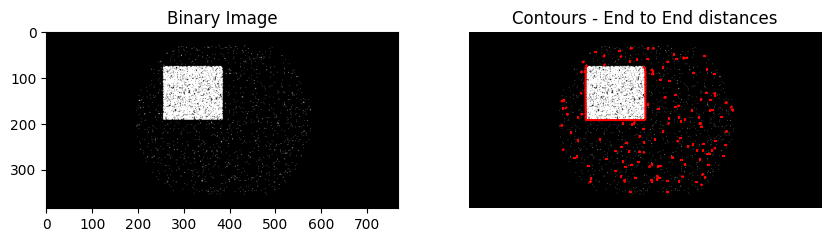

In [27]:
BlobLength(blob_image)

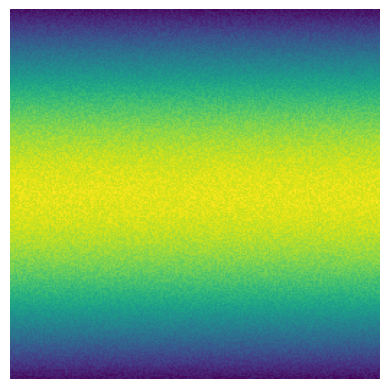

In [23]:
width = 256
height = 256


sin_noise = np.sin(np.linspace(0, 1*np.pi, width))[:, np.newaxis] * 0


test = np.sin(np.linspace(0, 3*np.pi, width//4))[: , np.newaxis] * np.ones((1, height//2))
another = np.sin(np.linspace(0, 3*np.pi, width//4))[:, np.newaxis] * np.ones((1, height//2))

mask = np.ones((height, width))
mask[height//4:height//2, width // 4:width // 2] = 1
ok = noise * mask

fig, ax = plt.subplots()
heatmap1 = ax.imshow(ok)
ax.axis("off")

plt.show()

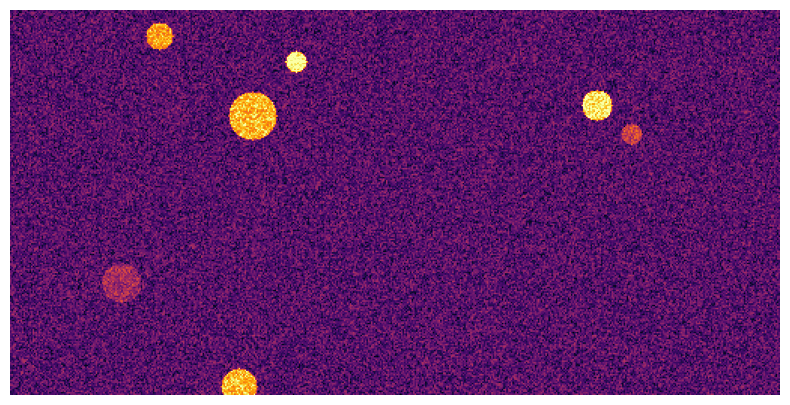

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import random

width = 512
height = 256

center_x, center_y = width // 2, height // 2
radius = width // 4
mask = np.ones((height, width))

background_noise = np.random.rand(height, width) * 0.2
hot_spots = np.random.rand(height, width) * 0.3 * mask
temperature = background_noise + hot_spots


num_circles = 7
for _ in range(num_circles):
    x = np.random.randint(0, width)
    y = np.random.randint(0, height)
    radius = np.random.randint(5, 20)
    circle_temp = np.random.rand() * 0.8 
    for i in range(height):
        for j in range(width):
            distance = np.sqrt((i - y) ** 2 + (j - x) ** 2)
            if distance <= radius:
                temperature[i, j] += circle_temp

# Plotting the heatmap with multi-colored circles
fig, ax = plt.subplots(figsize=(10, 5))
heatmap = ax.imshow(temperature, cmap='inferno', vmin=0, vmax=1)  # Using inferno colormap
plt.axis('off')
plt.savefig(f"tempvariations.png",bbox_inches='tight', pad_inches=0)
plt.show()


In [41]:
plt.savefig(f"tempvariations.png",bbox_inches='tight', pad_inches=0)

<Figure size 640x480 with 0 Axes>

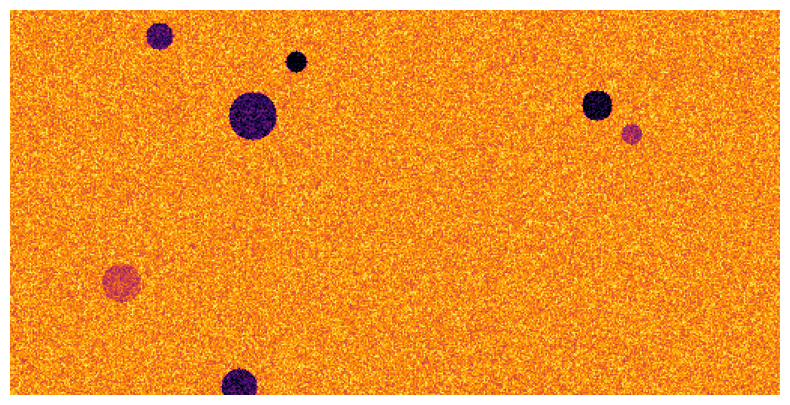

In [72]:
image = cv2.imread('tempvariations.png')
fig, ax = plt.subplots(figsize=(10, 5))
heatmap = ax.imshow(temperature, cmap='inferno_r', vmin=0, vmax=1)  # Using inferno colormap
plt.axis('off')
plt.show()


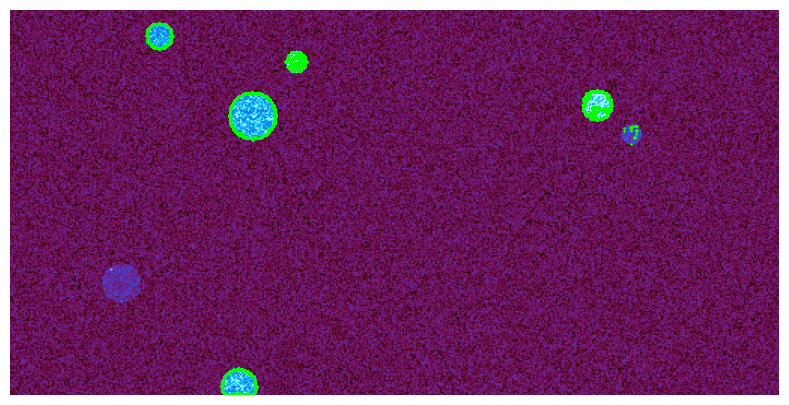

In [69]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('tempvariations.png')

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for the orange and yellow colors
lower_orange = np.array([10, 100, 100])
upper_orange = np.array([25, 255, 255])
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([35, 255, 255])

# Threshold the image to get a binary mask for each color
orange_mask = cv2.inRange(hsv_image, lower_orange, upper_orange)
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# Combine the masks using bitwise OR
mask = cv2.bitwise_or(orange_mask, yellow_mask)

# Find the contours of the objects in the mask
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
for cnt in contours:
    cv2.drawContours(image, [cnt], 0, (0, 255, 0), 2)

fig, ax = plt.subplots(figsize=(10, 5))
heatmap = ax.imshow(image, cmap='inferno', vmin=0, vmax=1)  # Using inferno colormap
plt.axis('off')
plt.show()


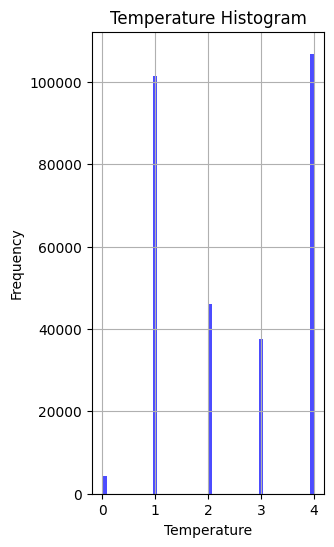

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Generate an artificial image with varying temperature values
height, width = 256, 256

# Flatten the temperature matrix
temperature_flat = segmented_image.flatten()

# Plot the histogram
plt.figure(figsize=(3, 6))
plt.hist(temperature_flat, bins=50, color='blue', alpha=0.7)
plt.title('Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
